In [1]:
import sys
import os

#look in the folder above this one too.
sys.path.append(os.path.abspath(".."))

#CLEANING THE DATA

In [2]:
import pandas as pd
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
ip_df = pd.read_csv("../data/raw/IpAddress_to_Country.csv")
ip_df.shape

(138846, 3)

In [39]:
from src.preprocessing import fix_data_types, merge_geolocation, clean_data, add_features

#Fix IPs (Float -> Integer)

In [40]:
fraud_df, ip_df = fix_data_types(fraud_df, ip_df)

Fix the Data Types

In [9]:
print(fraud_df.dtypes)


user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address                 int64
class                      int64
dtype: object


In [5]:
fraud_df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0


In [12]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  int64         
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 12.7+ MB


In [13]:
ip_df.dtypes

lower_bound_ip_address     int64
upper_bound_ip_address     int64
country                   object
dtype: object

In [15]:

ip_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216,16777471,Australia
1,16777472,16777727,China
2,16777728,16778239,China
3,16778240,16779263,Australia
4,16779264,16781311,China


THE GEOLOCATION MERGE

In [41]:
merged_df = merge_geolocation(fraud_df, ip_df)

In [42]:
print("Merge Complete. Sample:")

print(merged_df[["user_id", "country", "class"]].head(10))

Merge Complete. Sample:
     user_id    country  class
634   247547  Australia      0
635   220737   Thailand      0
636   390400      China      0
637    69592      China      0
638   174987   Thailand      0
639    23204      China      0
640   155230   Thailand      0
641   199369      Japan      0
642   236894      Japan      0
643   379446      Japan      0


FINAL CLEANING

In [43]:
merged_df = clean_data(merged_df)

In [29]:
# Final Shape Check
print(f"Final Cleaned Data Shape: {merged_df.shape}")


Final Cleaned Data Shape: (129146, 14)


# FEATURE ENGINEERING

In [44]:
merged_df = add_features(merged_df)

print("Feature engineering complete.")
print(merged_df[['time_since_signup', 'hour_of_day', 'day_of_week']].head())

Feature engineering complete.
     time_since_signup  hour_of_day  day_of_week
634          3632215.0            3            6
635          1231637.0           20            2
636          1997534.0           23            5
637          7640897.0           16            5
638         10249579.0            4            1


# EDA VISUALIZATIONS

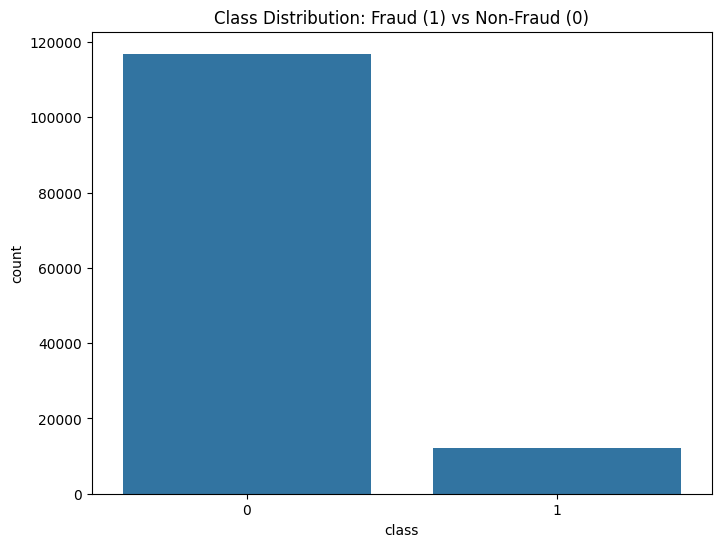

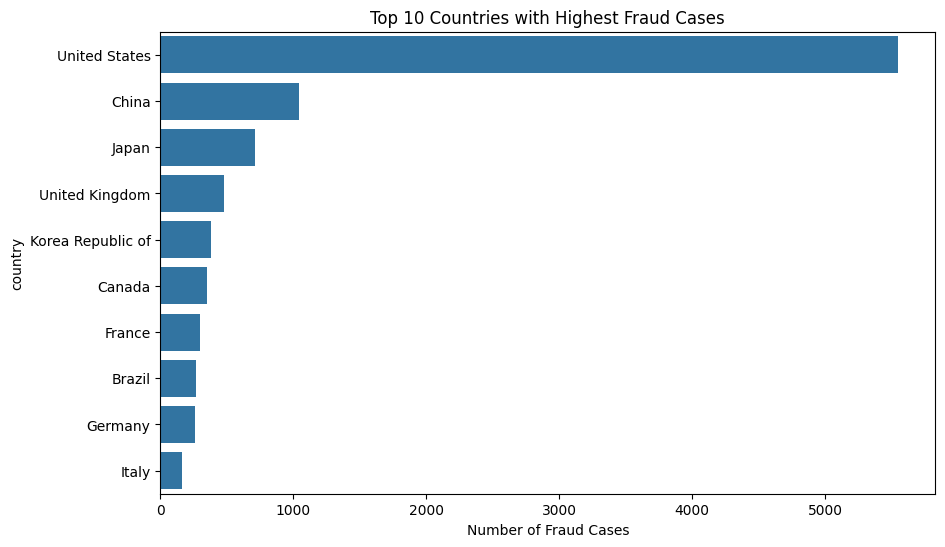

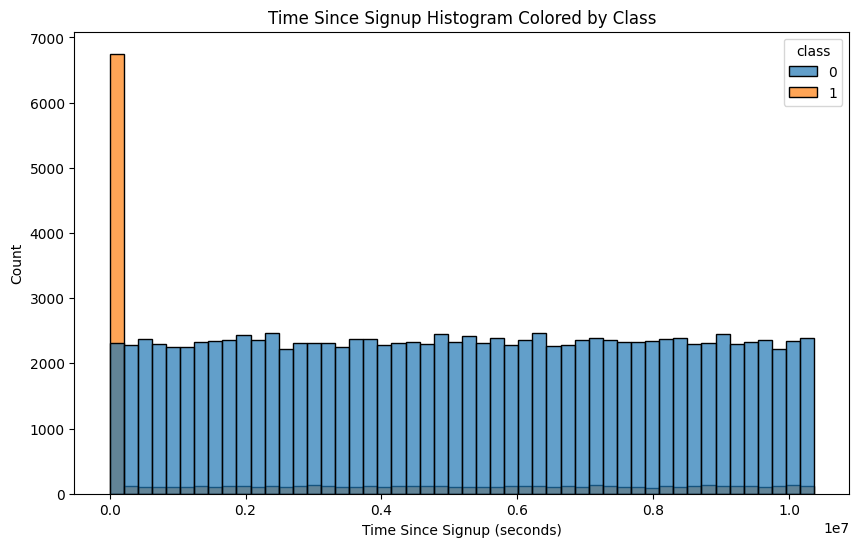

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='class')
plt.title('Class Distribution: Fraud (1) vs Non-Fraud (0)')
plt.savefig('../images/class_distribution.png')
plt.show()

# Fraud by Country (Top 10)
fraud_by_country = merged_df[merged_df['class'] == 1]['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_country.values, y=fraud_by_country.index)
plt.title('Top 10 Countries with Highest Fraud Cases')
plt.xlabel('Number of Fraud Cases')
plt.savefig('../images/fraud_by_country.png')
plt.show()

# Time Since Signup Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='time_since_signup', hue='class', bins=50, alpha=0.7)
plt.title('Time Since Signup Histogram Colored by Class')
plt.xlabel('Time Since Signup (seconds)')
plt.savefig('../images/time_since_signup_hist.png')
plt.show()

In [33]:
fraud_df.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [36]:
ip_df.isna().sum()

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [37]:
merged_df.isna().sum()

user_id                   0
signup_time               0
purchase_time             0
purchase_value            0
device_id                 0
source                    0
browser                   0
sex                       0
age                       0
ip_address                0
class                     0
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64